 # Statistics

* Mean(average),Mode, Median
* percentile
* Outliers

mean is sensitive to outlier, median is not

Median: Arrange in accending order and find the middel value (used for filling na/ descriptive anlytics)

 **Percentile**(used outlier detection/relative marking in exam)

1)50% data on right and 50% on left(median is 50th percentile)

2)100% -100% of the values are less tahn or equal to the number.(e.g. 10million)

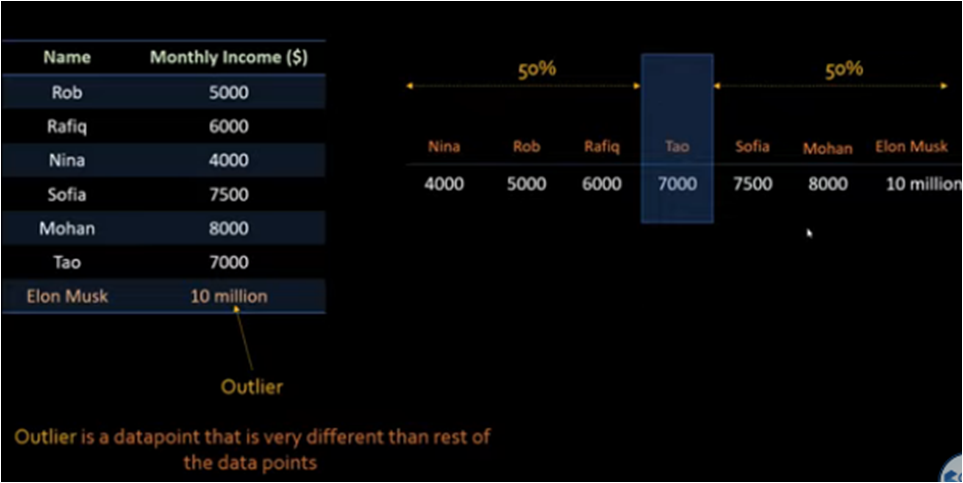

IQR(interquartile range)

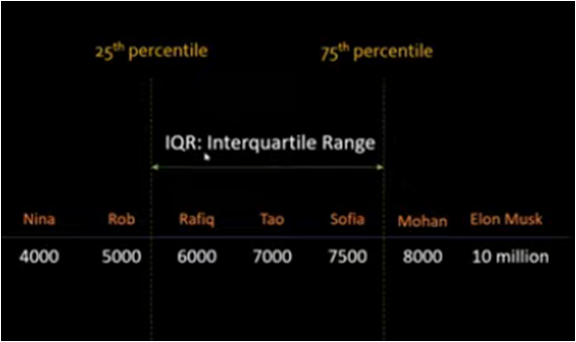

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MANISH_TOPIC WISE_IPYNB/reference_or _dataset/Statistics/income.csv", names=["name","income"], skiprows=[0])
df

name    income
0        Rob      5000
1      Rafiq      6000
2       Nina      4000
3      Sofia      7500
4      Mohan      8000
5        Tao      7000
6  Elon Musk  10000000

In [ ]:
df.describe()

income
count  7.000000e+00
mean   1.433929e+06
std    3.777283e+06
min    4.000000e+03
25%    5.500000e+03
50%    7.000000e+03
75%    7.750000e+03
max    1.000000e+07

In [ ]:
df.income.quantile(0)

4000.0

In [ ]:
df.income.quantile(1)

10000000.0

In [ ]:
df.income.quantile(.25)

5500.0

In [ ]:
df.income.quantile(0.25,interpolation="higher")

6000.0

In [ ]:
df.income.quantile(.5)

7000.0

In [ ]:
percentile99=df.income.quantile(.99) # let say we decide on 99% are ok
percentile99

9400479.999999994

In [ ]:
newdf=df[df.income<percentile99]
newdf

name  income
0    Rob    5000
1  Rafiq    6000
2   Nina    4000
3  Sofia    7500
4  Mohan    8000
5    Tao    7000

In [ ]:
# fillna by median
df['income'][3]=np.NaN
df


name      income
0        Rob      5000.0
1      Rafiq      6000.0
2       Nina      4000.0
3      Sofia         NaN
4      Mohan      8000.0
5        Tao      7000.0
6  Elon Musk  10000000.0

In [ ]:
df=df.fillna(df.income.median())
df

name      income
0        Rob      5000.0
1      Rafiq      6000.0
2       Nina      4000.0
3      Sofia      6500.0
4      Mohan      8000.0
5        Tao      7000.0
6  Elon Musk  10000000.0

# Exercise New york city Airbnb data set

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MANISH_TOPIC WISE_IPYNB/reference_or _dataset/Statistics/AB_NYC_2019.csv')
df.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [ ]:
df.minimum_nights.quantile(.5)

3.0

In [ ]:
df.minimum_nights.quantile(.75)

5.0

In [ ]:
df.minimum_nights.quantile(.99)

45.0

In [ ]:
df2=df[df.minimum_nights<365]
df2.shape

(48852, 16)

In [ ]:
min_thresold, max_thresold = df2.price.quantile([0.01,0.999])
min_thresold, max_thresold

(30.0, 3000.0)

In [ ]:
df3 = df2[(df2.price>min_thresold)&(df2.price<max_thresold)]
df3.shape

(48140, 16)

In [ ]:
df3.sample(5)

id                                          name    host_id  \
28368  22034977                          South Bronx Hideaway  148100571   
21800  17522686             Prospect Heights Studio Apartment   25227079   
17970  14080022  Beautiful 2B/2B at Central Park and the AMNH   84632856   
12390   9550714    Brooklyn Charmer, Close to Everything NYC!   48399349   
42956  33362477        Comfy 2 bedroom apartment in Manhattan    1692538   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
28368     Jenny               Bronx           Soundview  40.82668  -73.88220   
21800    Daniel            Brooklyn    Prospect Heights  40.67435  -73.96691   
17970    Brooke           Manhattan     Upper West Side  40.77743  -73.97616   
12390     Lakan            Brooklyn   Downtown Brooklyn  40.69072  -73.99034   
42956  Nuttamon           Manhattan  Washington Heights  40.85482  -73.93137   

             room_type  price  minimum_nights  number_of_reviews last_review  \
28368  Entire home/apt     50               1                  2  2017-12-09   
21800  Entire home/apt    130               3                  2  2017-04-11   
17970  Entire home/apt    325               3                  4  2016-10-09   
12390  Entire home/apt    120               2                  1  2016-10-10   
42956  Entire home/apt    174               1                  6  2019-06-09   

       reviews_per_month  calculated_host_listings_count  availability_365  
28368               0.10                               2                 0  
21800               0.07                               1                 0  
17970               0.11                               1                 0  
12390               0.03                               1                 0  
42956               1.88                               5               324

In [ ]:
df3.price .describe()

count    48140.000000
mean       148.658600
std        153.021257
min         31.000000
25%         70.000000
50%        110.000000
75%        178.000000
max       2999.000000
Name: price, dtype: float64

# Standard deviation/ Mean absolute devation

These are matrics to measure how spread out (dispersed)data points are from the mean

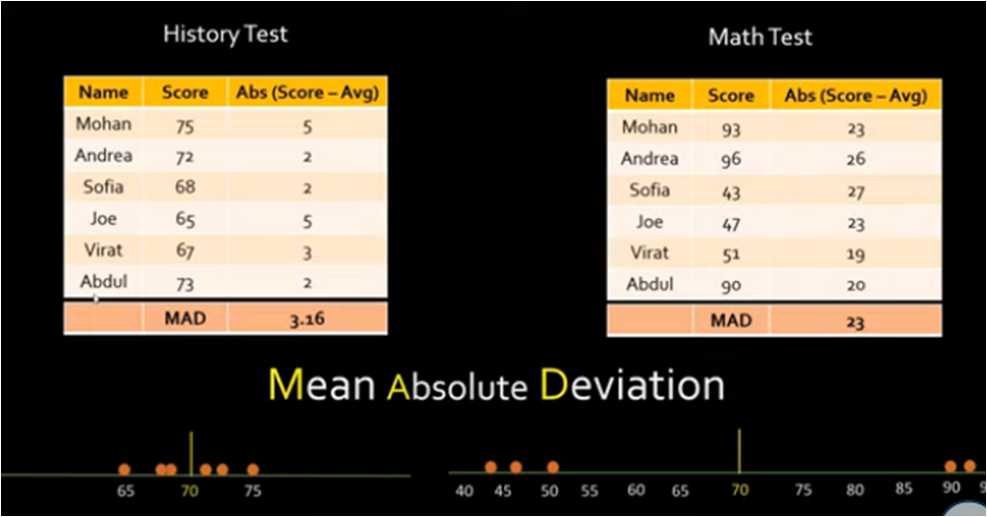

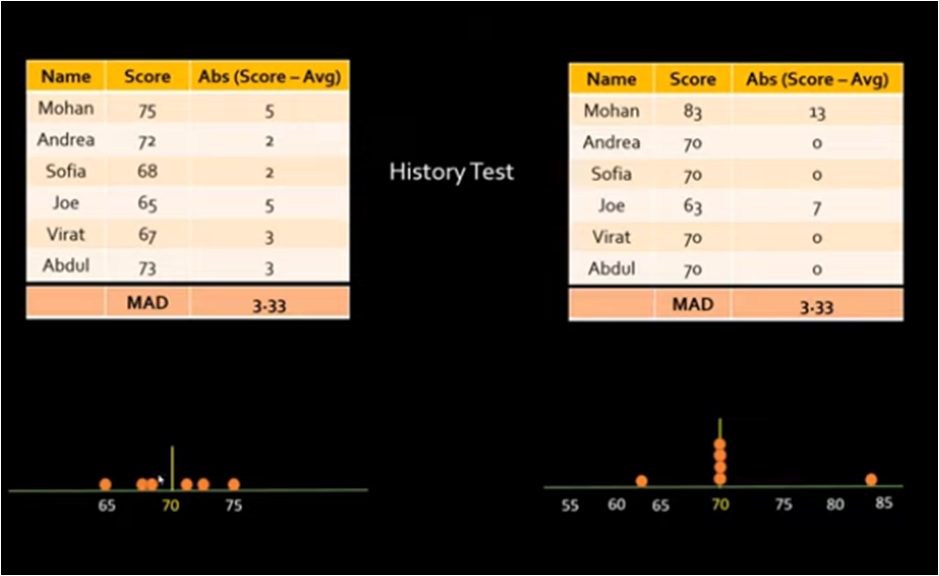

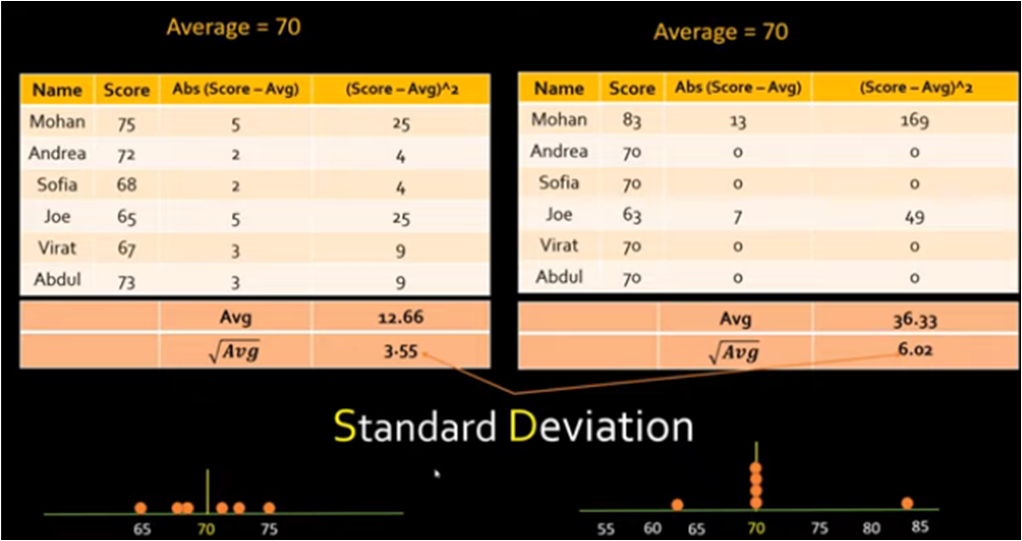

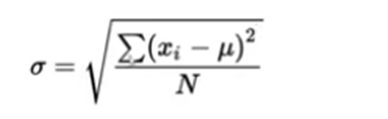

 Ridge and lasso

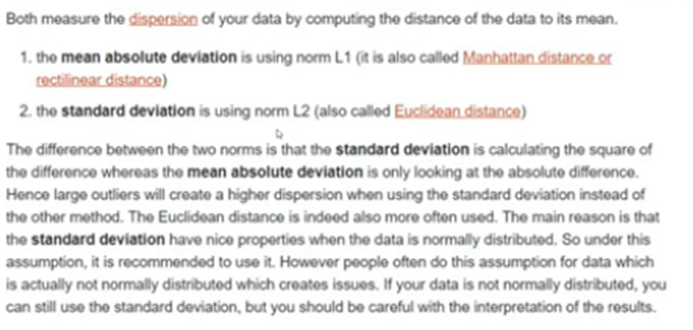

# Normal distribution Z score

* can be used for oulier removal in data analysis

* Most of the phenominon happen in nature follow normal distribution.

* few data points are far from mean and most of them are arround mean

e.g.

1.Mark in a test

2.height of people


e.g.

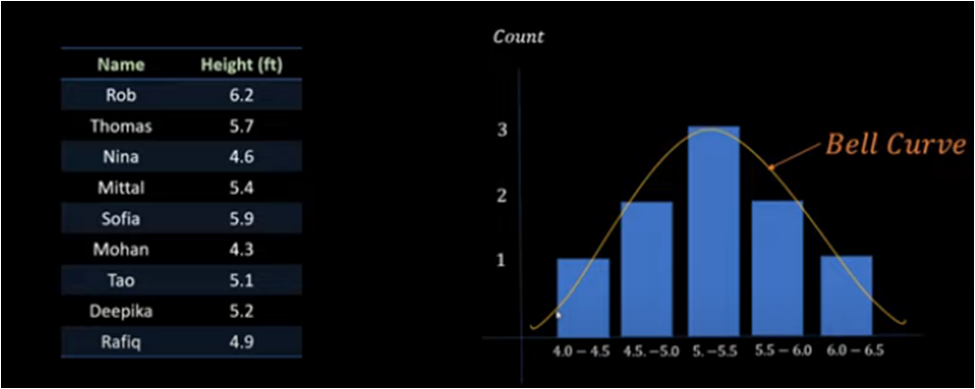

e.g.

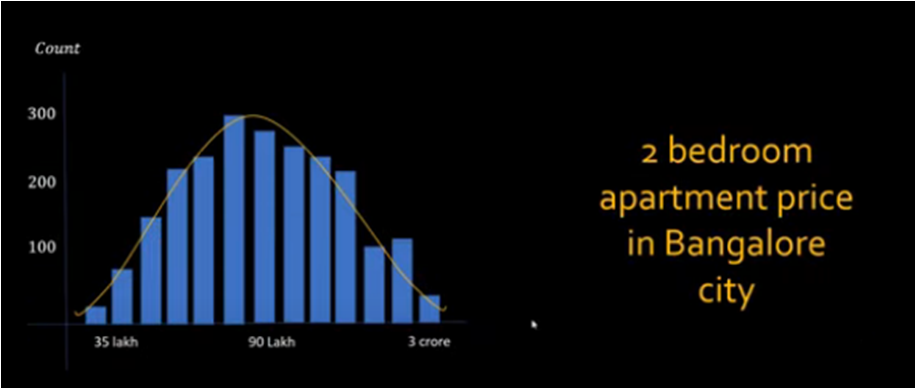

Here 9ft is an outlier and will cause problem in generalzation of the machine learning model.

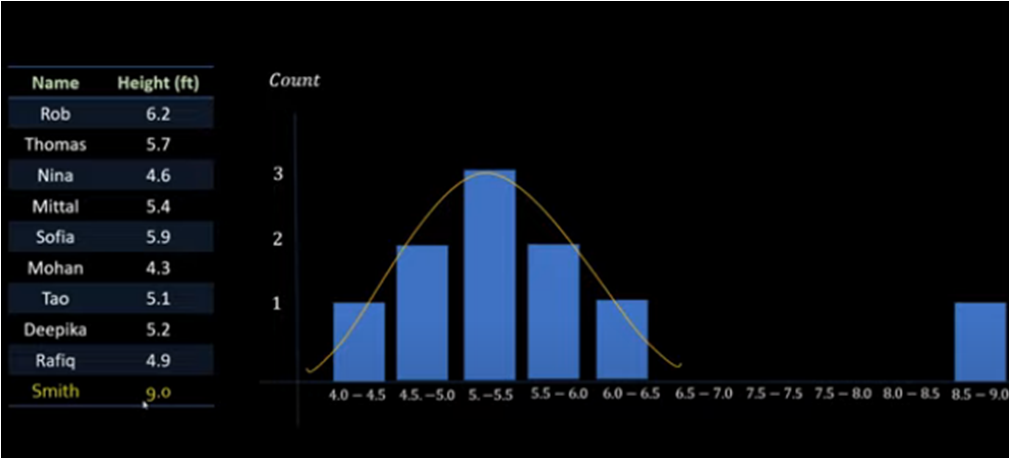


General guideline is that data points beyond 3 standard deviation can be treated as outliers.

Since we want to make model that generalze with the common data.(and not outlier or exception)

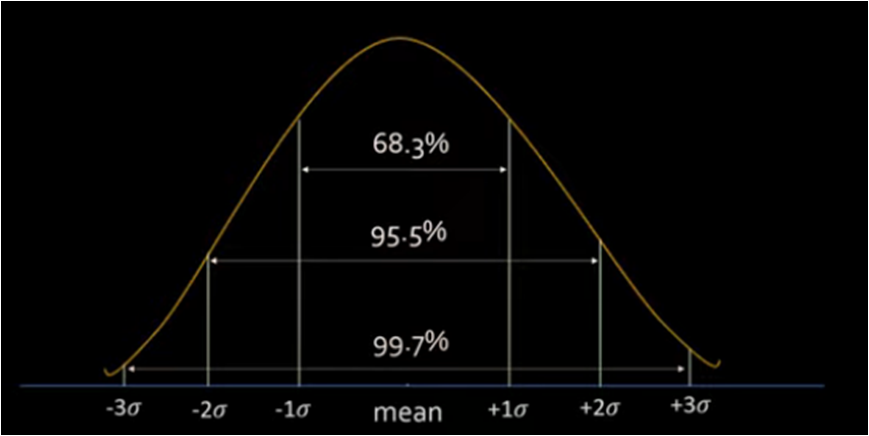

Z-score:
* can be calculated for each data point
* how many standard deviation away a datapoint is from mean

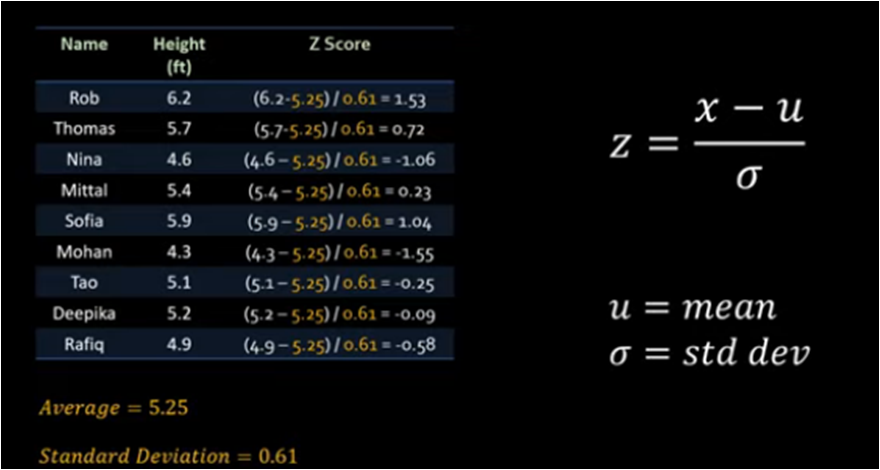

In [ ]:
import pandas as pd
import seaborn as sn

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MANISH_TOPIC WISE_IPYNB/reference_or _dataset/Statistics/heights.csv")
df.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

<Axes: xlabel='height', ylabel='Count'>

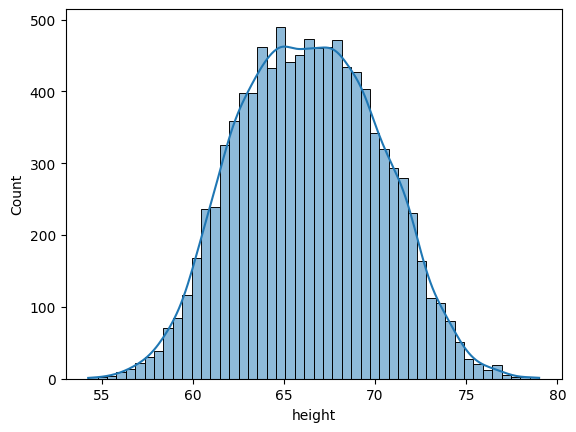

In [ ]:
sn.histplot(df.height, kde=True)

In [ ]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

gender     height    zscore
0   Male  73.847017  1.943964
1   Male  68.781904  0.627505
2   Male  74.110105  2.012343
3   Male  71.730978  1.393991
4   Male  69.881796  0.913375

In [ ]:
df[(df['zscore']>3) | (df['zscore']<-3)]

gender     height    zscore
994     Male  78.095867  3.048271
1317    Male  78.462053  3.143445
2014    Male  78.998742  3.282934
3285    Male  78.528210  3.160640
3757    Male  78.621374  3.184854
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027

In [ ]:
df_no_outlier=df[(df['zscore']>-3) & (df['zscore']<3)]
df_no_outlier.shape

(9993, 3)

In [ ]:
from scipy.stats import zscore


# Logarithm

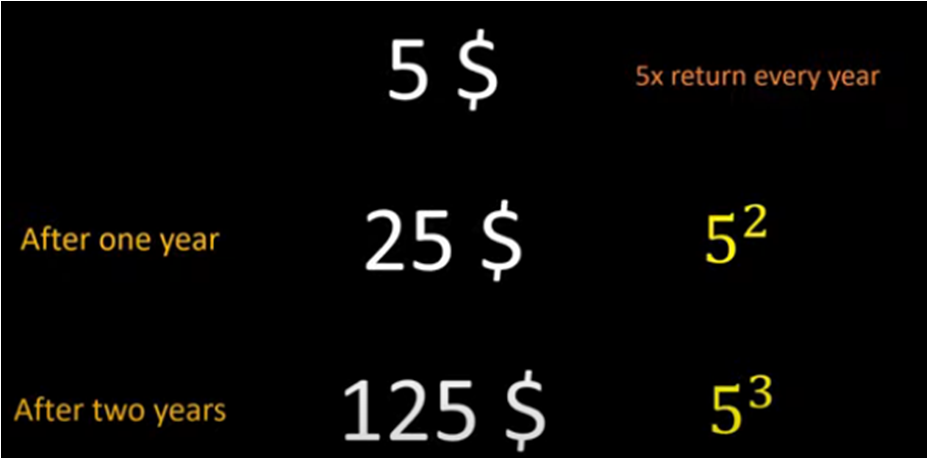



logarithm is an inverse of an exponent

In [ ]:
import pandas as pd

dict={'Company':["tesla","Uber","Amazon","jindal steel","Axis bank"],
      "revenue":[31,11,386,4.7,5.6]
      }

In [ ]:
df=pd.DataFrame(dict)
df

Company  revenue
0         tesla     31.0
1          Uber     11.0
2        Amazon    386.0
3  jindal steel      4.7
4     Axis bank      5.6

<Axes: xlabel='Company'>

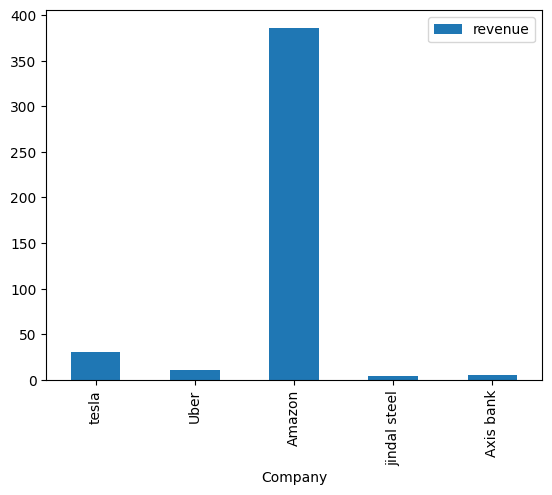

In [ ]:
df.plot(x='Company', y='revenue', kind='bar')

<Axes: xlabel='Company'>

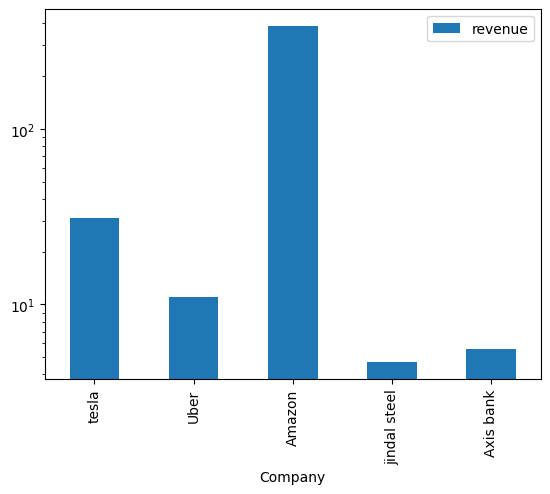

In [ ]:
df.plot(x='Company', y='revenue',kind='bar', logy=True) # now y sacle is logrithumic

# log normal distribution

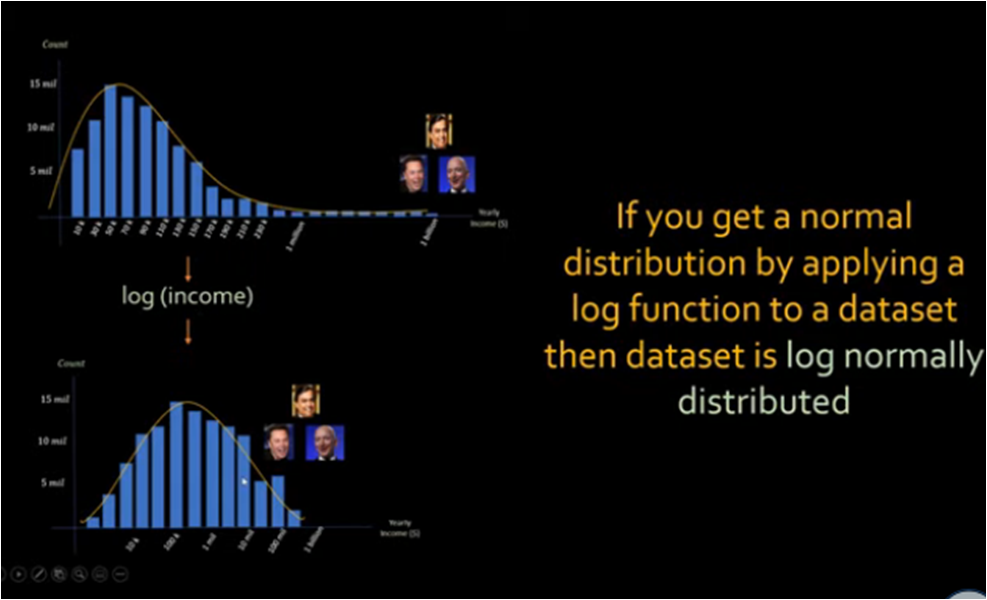

Here Pooja's income is 550000 which is much higher then other, so if we use log income it will be better as Machine learing works better with normalised data

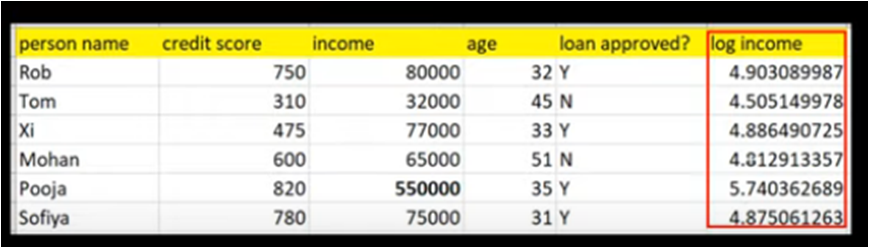

# Sin Cos Tan (Cosine similarity)

Here the documents are converted in vector form using count of certaion words

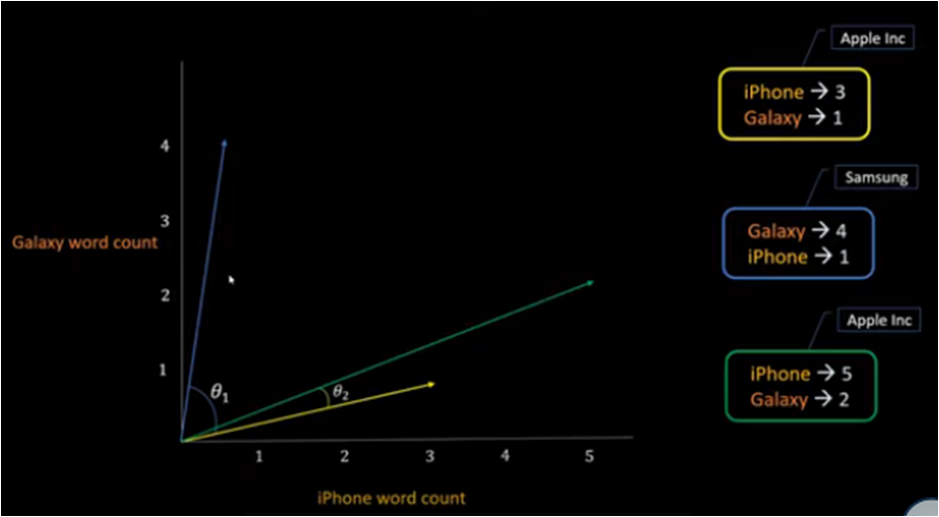

similarity cannot be measured in angle so we used cosine (range 0 to 1)

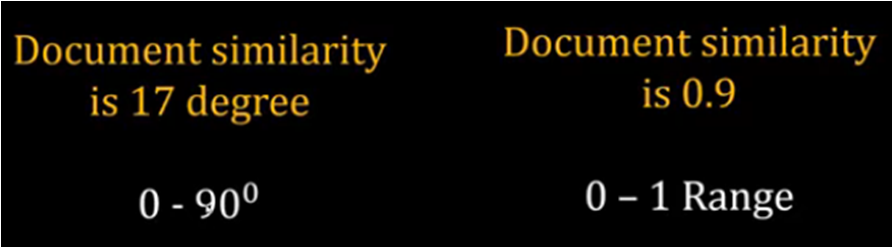

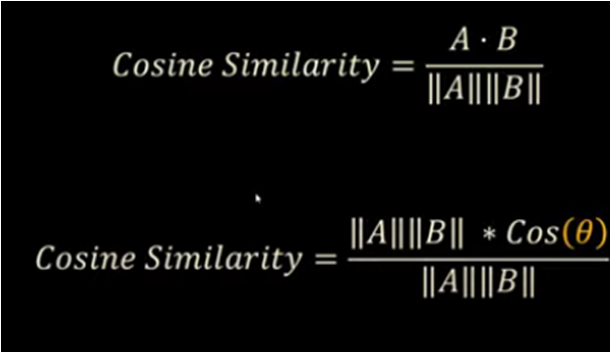

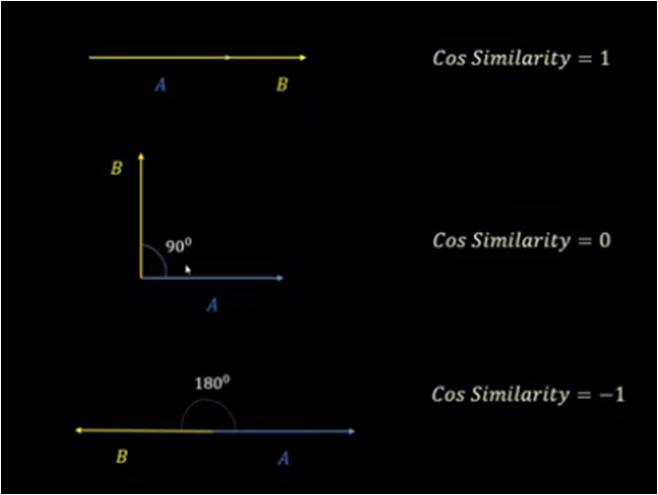

cos distance= 1- cos similarity  (only expressed in positive space)

# A/B Testing



* Amazone, Facebook use this when the make any change in the lay out of web site.


* Both A and B are run for same time (with unbiased condition i.e. diverse customers)

and the performance from the test is compared

# Hypothesis Testing

Null Hypothesis (Ho): established fact
 till date(e.g.sun move around earth,Drug A is more effective than B)


Alternate Hypothesis (Ha): a new saying(thesis) (claim we want to prove) (we will be skpectical as it is opposite of establised fact)  (e.g. drug B is more effective than A)

we try to reject null hytohesis, which prove that alternate hypothesis(second most claim)  becomes true



e.g.: Null: roger in no 1 player(or djokowik is no 2 player)
            
Alternate: roger is not no 1 player.

if we prove roger is not no 1 player, the second most fact becomes truth i.e. djokowik is no 1 player



The process of Hypothesis testing ruleout the element of randomness
1. Z Test
2. T Test
3. ANOVA
4. ChiSquare Test

# Modified Z Score

Many times Modefied Z score is used to detect outliers.

**Modefied Z score vs simple Z score **

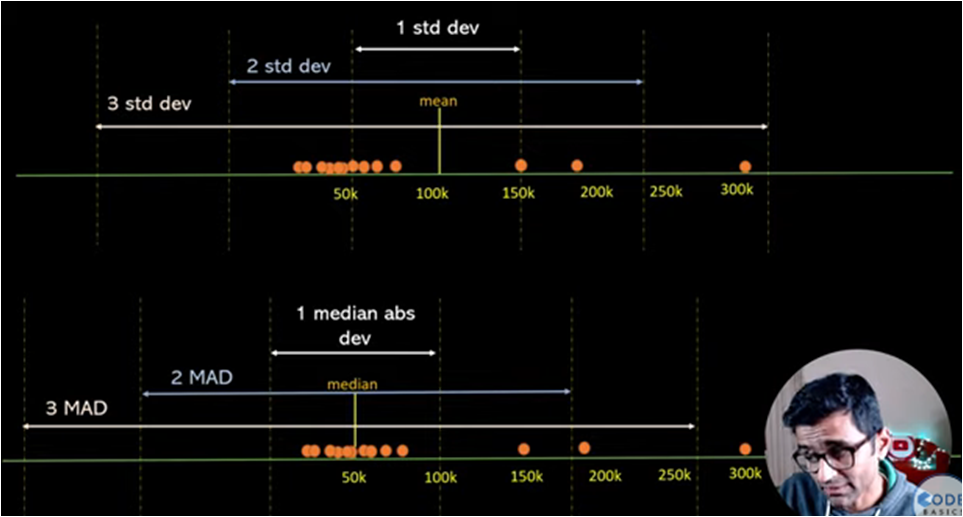

Formula

Modefied Z score of >3.5 is treated as outlier

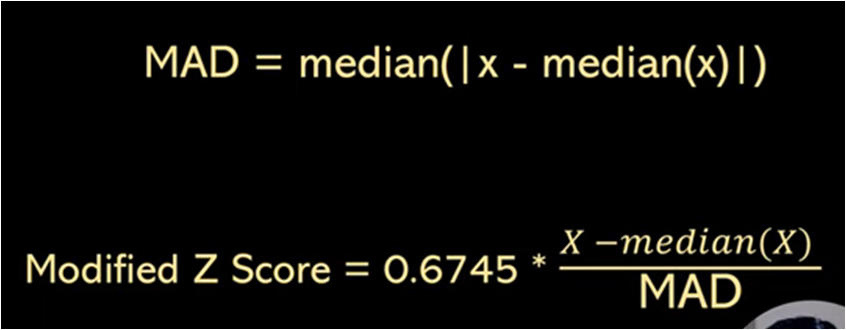

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MANISH_TOPIC WISE_IPYNB/reference_or _dataset/Statistics/movie_revenues.csv")
df.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   

       original_title                                           overview  \
0              Avatar  In the 22nd century, a paraplegic Marine is di...   
1  You, Me and Dupree  After standing in as best man for his longtime...   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   
1   18.600367  [{"name": "Universal Pictures", "id": 33}, {"n...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   12/10/2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...    7/14/2006   130431368   

   runtime                                   spoken_languages    status  \
0      162  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1      108           [{"iso_639_1": "en", "name": "English"}]  Released   

                            tagline               title  vote_average  \
0       Enter the World of Pandora.              Avatar           7.2   
1  Two's company. Dupree's a crowd.  You, Me and Dupree           5.4   

   vote_count  
0       11800  
1         407

In [ ]:
df.revenue.describe()

count    4.600000e+01
mean     1.879289e+08
std      4.551144e+08
min      8.522060e+05
25%      2.866957e+07
50%      8.381714e+07
75%      1.382135e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [ ]:
# To add a new column in df
df['revenue_mln'] = df['revenue'].apply(lambda x: x/1000000)
df.revenue_mln.describe()

#Lambda Functions in Python are anonymous functions, implying they don't have a name.
#The def keyword is needed to create a typical function in Python, as we already know.
#This function accepts any count of inputs but only evaluates and returns one expression.
# SYNTAX: lambda argument : expression
#         lambda x: x/100000

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [ ]:
#lambda fuction
a=lambda x: x+10
a(6)

16

In [ ]:
_, mean, std, *_ = df.revenue_mln.describe()

In [ ]:
mean

187.92889841304347

In [ ]:
std

455.1144234195408

In [ ]:
def get_z_score(value, mean, std):
    return (value - mean)/std

In [ ]:
df['z_score'] = df.revenue_mln.apply(lambda x: get_z_score(x, mean, std))
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
2   21000000  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   
2                             NaN   2575   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   
2  [{"id": 246, "name": "dancing"}, {"id": 470, "...                en   

         original_title                                           overview  \
0                Avatar  In the 22nd century, a paraplegic Marine is di...   
1    You, Me and Dupree  After standing in as best man for his longtime...   
2  The Tailor of Panama  A British spy is banished to Panama after havi...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   
1   18.600367  [{"name": "Universal Pictures", "id": 33}, {"n...  ...   
2    7.047975  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   

      revenue runtime                                   spoken_languages  \
0  2787965087     162  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1   130431368     108           [{"iso_639_1": "en", "name": "English"}]   
2    28008462     109  [{"iso_639_1": "en", "name": "English"}, {"iso...   

     status                                            tagline  \
0  Released                        Enter the World of Pandora.   
1  Released                   Two's company. Dupree's a crowd.   
2  Released  In a place this treacherous, what a good spy n...   

                  title vote_average vote_count  revenue_mln   z_score  
0                Avatar          7.2      11800  2787.965087  5.712929  
1    You, Me and Dupree          5.4        407   130.431368 -0.126336  
2  The Tailor of Panama          6.2         92    28.008462 -0.351385  

[3 rows x 22 columns]

In [ ]:
df[df.z_score>3]

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   

      revenue runtime                                   spoken_languages  \
0  2787965087     162  [{"iso_639_1": "en", "name": "English"}, {"iso...   

     status                      tagline   title vote_average vote_count  \
0  Released  Enter the World of Pandora.  Avatar          7.2      11800   

   revenue_mln   z_score  
0  2787.965087  5.712929  

[1 rows x 22 columns]

In [ ]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [ ]:
MAD = get_mad(df.revenue_mln)
median = np.median(df.revenue_mln)
MAD, median

(56.399542499999995, 83.8171415)

General guideline for modified Z score is to use 3.5 as a thresold. i.e. anything that has a mod z score of 3.5 or more is an outlier

In [ ]:
def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD

In [ ]:
df['mod_z_score'] = df.revenue_mln.apply(lambda x: get_modified_z_score(x, median, MAD))
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
2   21000000  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   
2                             NaN   2575   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   
2  [{"id": 246, "name": "dancing"}, {"id": 470, "...                en   

         original_title                                           overview  \
0                Avatar  In the 22nd century, a paraplegic Marine is di...   
1    You, Me and Dupree  After standing in as best man for his longtime...   
2  The Tailor of Panama  A British spy is banished to Panama after havi...   

   popularity                               production_companies  ... runtime  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...     162   
1   18.600367  [{"name": "Universal Pictures", "id": 33}, {"n...  ...     108   
2    7.047975  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...     109   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                                             tagline                 title  \
0                        Enter the World of Pandora.                Avatar   
1                   Two's company. Dupree's a crowd.    You, Me and Dupree   
2  In a place this treacherous, what a good spy n...  The Tailor of Panama   

  vote_average vote_count  revenue_mln   z_score  mod_z_score  
0          7.2      11800  2787.965087  5.712929    32.339762  
1          5.4        407   130.431368 -0.126336     0.557474  
2          6.2         92    28.008462 -0.351385    -0.667434  

[3 rows x 23 columns]

In [ ]:
df[df.mod_z_score>3.5]

budget                                             genres  \
0   237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
7   150000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
12   25000000  [{"id": 53, "name": "Thriller"}, {"id": 28, "n...   

                         homepage      id  \
0     http://www.avatarmovie.com/   19995   
7   http://www.jurassicworld.com/  135397   
12                            NaN     619   

                                             keywords original_language  \
0   [{"id": 1463, "name": "culture clash"}, {"id":...                en   
7   [{"id": 1299, "name": "monster"}, {"id": 1718,...                en   
12  [{"id": 1156, "name": "sister sister relations...                en   

    original_title                                           overview  \
0           Avatar  In the 22nd century, a paraplegic Marine is di...   
7   Jurassic World  Twenty-two years after the events of Jurassic ...   
12   The Bodyguard  A former Secret Service agent grudgingly takes...   

    popularity                               production_companies  ...  \
0   150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   
7   418.708552  [{"name": "Universal Studios", "id": 13}, {"na...  ...   
12   26.576385  [{"name": "Tig Productions", "id": 335}, {"nam...  ...   

   runtime                                   spoken_languages    status  \
0      162  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
7      124           [{"iso_639_1": "en", "name": "English"}]  Released   
12     129           [{"iso_639_1": "en", "name": "English"}]  Released   

                                              tagline           title  \
0                         Enter the World of Pandora.          Avatar   
7                                   The park is open.  Jurassic World   
12  Never let her out of your sight. Never let you...   The Bodyguard   

   vote_average vote_count  revenue_mln   z_score  mod_z_score  
0           7.2      11800  2787.965087  5.712929    32.339762  
7           6.5       8662  1513.528810  2.912674    17.098375  
12          6.1        661   411.006740  0.490158     3.912964  

[3 rows x 23 columns]